# Can Data Diagnose Heart Disease Better Than Doctors?

By: Edward Zou, Hui Lin Shan, Reimi Shishido, and Emma Lo (Group 45)

## Introduction:

*Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal*

Heart disease refers to several cardiovascular conditions that, due to narrowing of arteries causing restricted blood flow, can fatally affect the structure and function of the heart. Research shows heart disease usually affects men at twice the rate it affects women and is the second leading cause of death in Canada, yet misdiagnosis still occurs 16%-68% of the time. Our group’s goal is to identify if an individual has heart disease by comparing their attributes to attributes of patients confirmed to have heart disease. 


*Clearly state the question you will try to answer with your project*

Can we use a heart disease dataset to create a model that reliably predicts whether an undiagnosed individual has heart disease with a higher accuracy percentage than 84%? 84% is chosen because over 16% of cases are misdiagnosed. Therefore, less than 84% are correctly diagnosed, and we want to surpass this accuracy to improve  heart disease diagnoses. 


*Identify and describe the dataset that will be used to answer the question*

We will use the processed Cleveland heart disease dataset from the UCI Machine Learning Repository. This dataset has 14 attributes/columns (taken from a larger collection of 76 attributes) related to whether or not an individual has heart disease. There were datasets from four different institutions, but we chose the Cleveland data because it was the only dataset used by ML researchers. Therefore, we believe it could be the best dataset with the most helpful observations to ensure our model is the most effective it can be. We chose the processed dataset because the removed columns from the unprocessed datasets appeared insignificant (little correlation with predicting heart disease).

## Preliminary exploratory data analysis:
*Demonstrate that the dataset can be read from the web into R*

We loaded in libraries used in class we believe are helpful for wrangling and visualizing our data. We noticed our dataset was comma separated so we downloaded and read the file into R using the read_csv function and the dataset’s URL.

*Clean and wrangle your data into a tidy format*

To tidy our data, we renamed the columns using attributes provided on the dataset website. We extracted cholesterol and resting blood pressure to use as predictors because our research suggests these factors have the most significance when diagnosing heart disease. We also kept columns with the diagnosis of heart disease (our target variable) and the sex of each individual–because our research tells us different genders have different susceptibility to heart disease. Finally, we changed the column with heart disease diagnoses (where values of 1, 2, 3, and 4 indicates they have heart disease, and 0 means they do not) into factors representing an individual’s diagnosis so later visualizations and data processing are in true/false forms instead of continuous ranges. Our dataset is tidy because every column represents a variable (blood pressure, cholesterol, sex, diagnosis), and every row is one observation (one individual’s information).

In [1]:
#libraries to install
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#Reading in and wrangling data into tidy form
cleveland <- read_csv(
                url(
                    "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data" 
                ), col_names = FALSE) |>
    rename(age = X1, 
           sex = X2, 
           chest_pain = X3, 
           resting_blood_pressure = X4,
           cholesterol = X5, 
           fast_blood_sugar = X6, 
           resting_electrocardiographic_results = X7,
           maximum_heart_rate_achieved = X8, 
           exercise_induced_angina = X9,
           ST_depression_induced_by_exercise_relative_to_rest = X10, 
           the_slope_of_the_peak_exercise_ST_segment = X11, 
           number_of_major_vessels_colored_by_flourosopy = X12, 
           thalassemia = X13,
           diagnosis_of_heart_disease = X14
          ) |>
    select(sex, cholesterol, resting_blood_pressure, diagnosis_of_heart_disease) |>
    mutate(diagnosis_of_heart_disease = as_factor(diagnosis_of_heart_disease),
                diagnosis_of_heart_disease = recode(diagnosis_of_heart_disease, 
                                                    "0" = "No", 
                                                    "1" = "Yes",
                                                    "2" = "Yes",
                                                    "3" = "Yes",
                                                    "4" = "Yes")
          )
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex,cholesterol,resting_blood_pressure,diagnosis_of_heart_disease
<dbl>,<dbl>,<dbl>,<fct>
1,233,145,No
1,286,160,Yes
1,229,120,Yes
⋮,⋮,⋮,⋮
1,131,130,Yes
0,236,130,Yes
1,175,138,No


*Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data*


- We split our dataset into 70% training data and 30% testing data because we believe this would be sufficient enough for initial observations. There is enough data to train a model as well as enough data to test our model’s accuracy. We could test our model later with different splits to see if there is an optimal distribution to maximize our prediction accuracy. We created a table using our training data to report means of cholesterol and blood pressure for each gender, giving us an idea of average levels for each sex. The table shows males and females have different variable averages, confirming we should create different models for each sex. The tibbles represent number of observations for each sex, and indicate there are more male observations. This means the accuracy of our female model may be less accurate due to less training data. This fact will be considered in any conclusions we make.

In [3]:
#Summarizing data in tables
male_data <- cleveland |>
        filter(sex == 1)

female_data <- cleveland |>
        filter(sex == 0)

male_split <- initial_split(male_data, prop = 0.70, strata = diagnosis_of_heart_disease)
male_train <- training(male_split)   
male_test <- testing(male_split)

female_split <- initial_split(female_data, prop = 0.70, strata = diagnosis_of_heart_disease)
female_train <- training(female_split)   
female_test <- testing(female_split)

cholesterol_average_male <- male_train |>
        summarize(cholesterol = mean(cholesterol))

cholesterol_average_female <- female_train |>
        summarize(cholesterol = mean(cholesterol))


resting_blood_pressure_average_male <- male_train |>
        summarize(resting_blood_pressure = mean(resting_blood_pressure))

resting_blood_pressure_average_female <- female_train |>
        summarize(resting_blood_pressure = mean(resting_blood_pressure))

average_table <- data.frame(X1 = cholesterol_average_male,
                            X2 = cholesterol_average_female,
                            X3 = resting_blood_pressure_average_male,
                            X4 = resting_blood_pressure_average_female) |>
        rename(male_cholesterol_average = cholesterol, female_cholesterol_average = cholesterol.1,
               male_resting_blood_pressure_average = resting_blood_pressure,
               female_resting_blood_pressure_average = resting_blood_pressure.1,)

#male_data
#female_data
#cholesterol_average_male
#cholesterol_average_female
#resting_blood_pressure_average_male
#resting_blood_pressure_average_female

average_table

male_count <- male_train |>
        summarize(number_of_male_observations = n())

female_count <- female_train |>
        summarize(number_of_female_observations = n())

male_count
female_count

male_cholesterol_average,female_cholesterol_average,male_resting_blood_pressure_average,female_resting_blood_pressure_average
<dbl>,<dbl>,<dbl>,<dbl>
239.3357,256.209,130.3497,135.2687


number_of_male_observations
<int>
143


number_of_female_observations
<int>
67


*Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis*

Using our training data, we made two visualizations; the first is a scatter graph plotting blood pressure vs. cholesterol for males. The second plot displays the same variables for females. Both are coloured by diagnosis. These graphs show whether there are observable trends and correlations between the predictor variables and the diagnosis-telling us if the predictor variables selected were informative and providing a comparison between data for males and females. Comparing the graphs below, females show a weak positive correlation between high blood pressure/cholesterol and more patients diagnosed with heart disease. There appears to be no trend for males. However, the graphs display higher proportions of males have heart disease compared to females. This is interesting as our previous table showed women in the dataset had higher average cholesterol and blood pressure.

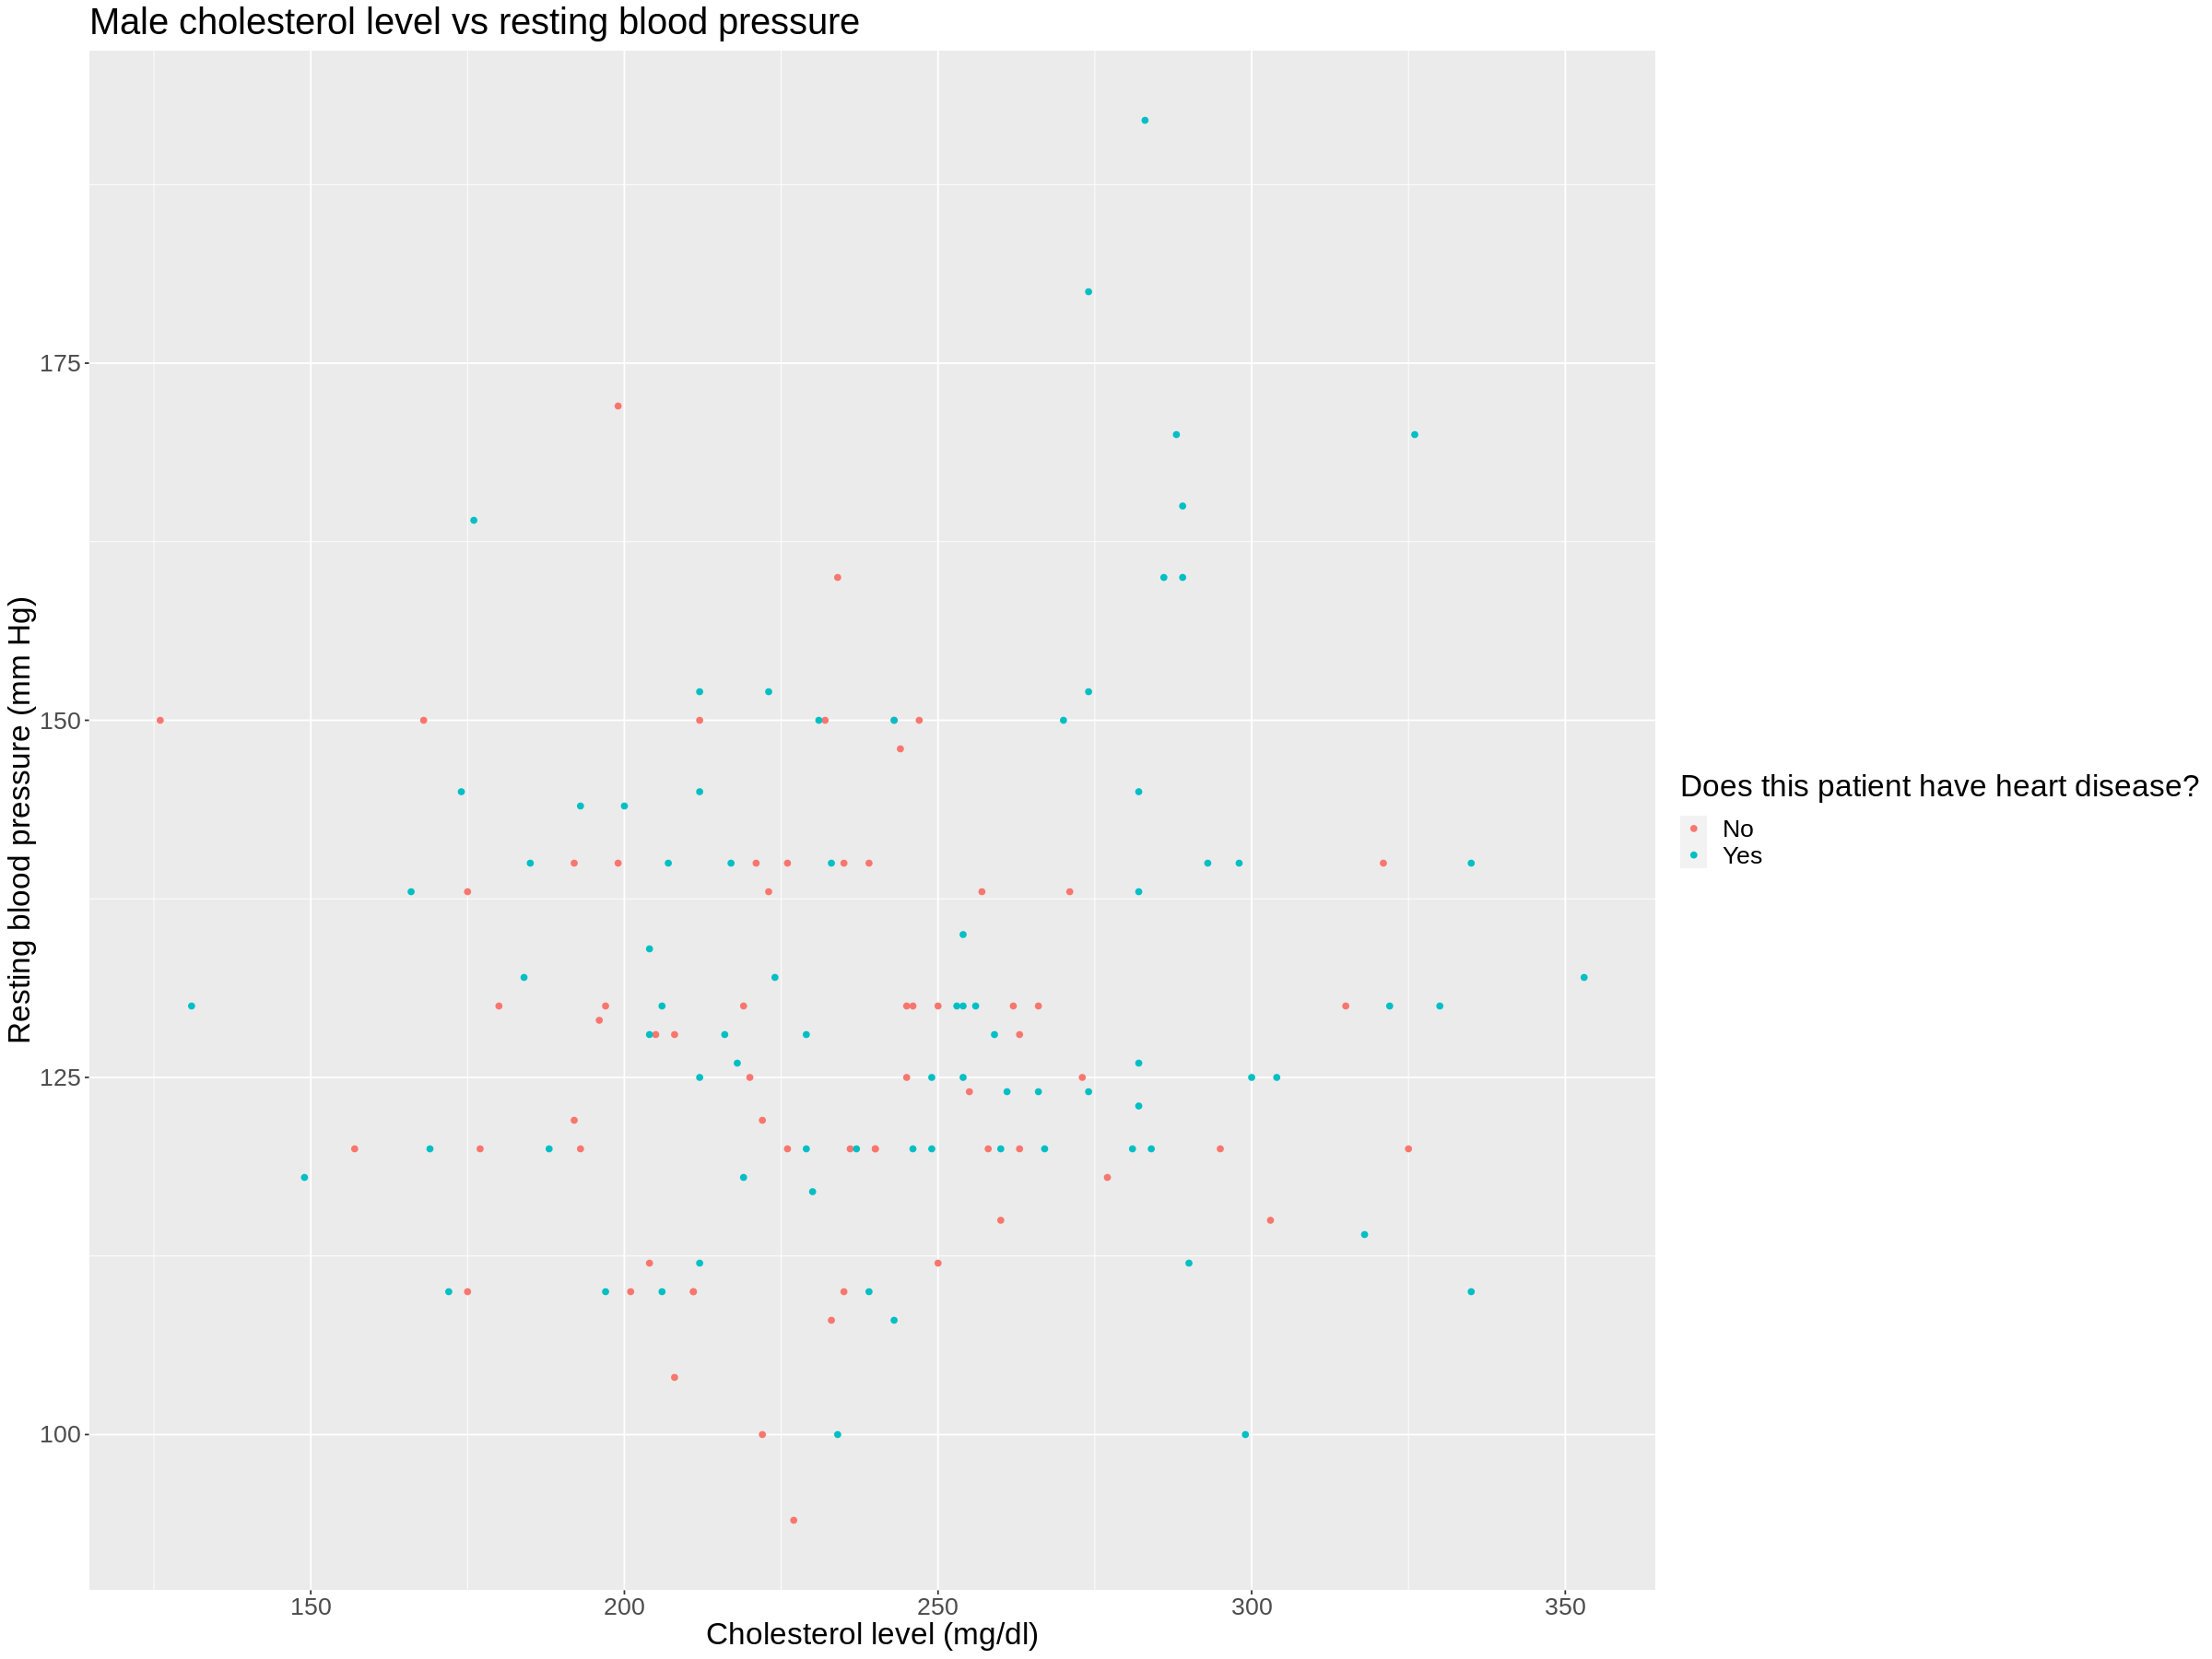

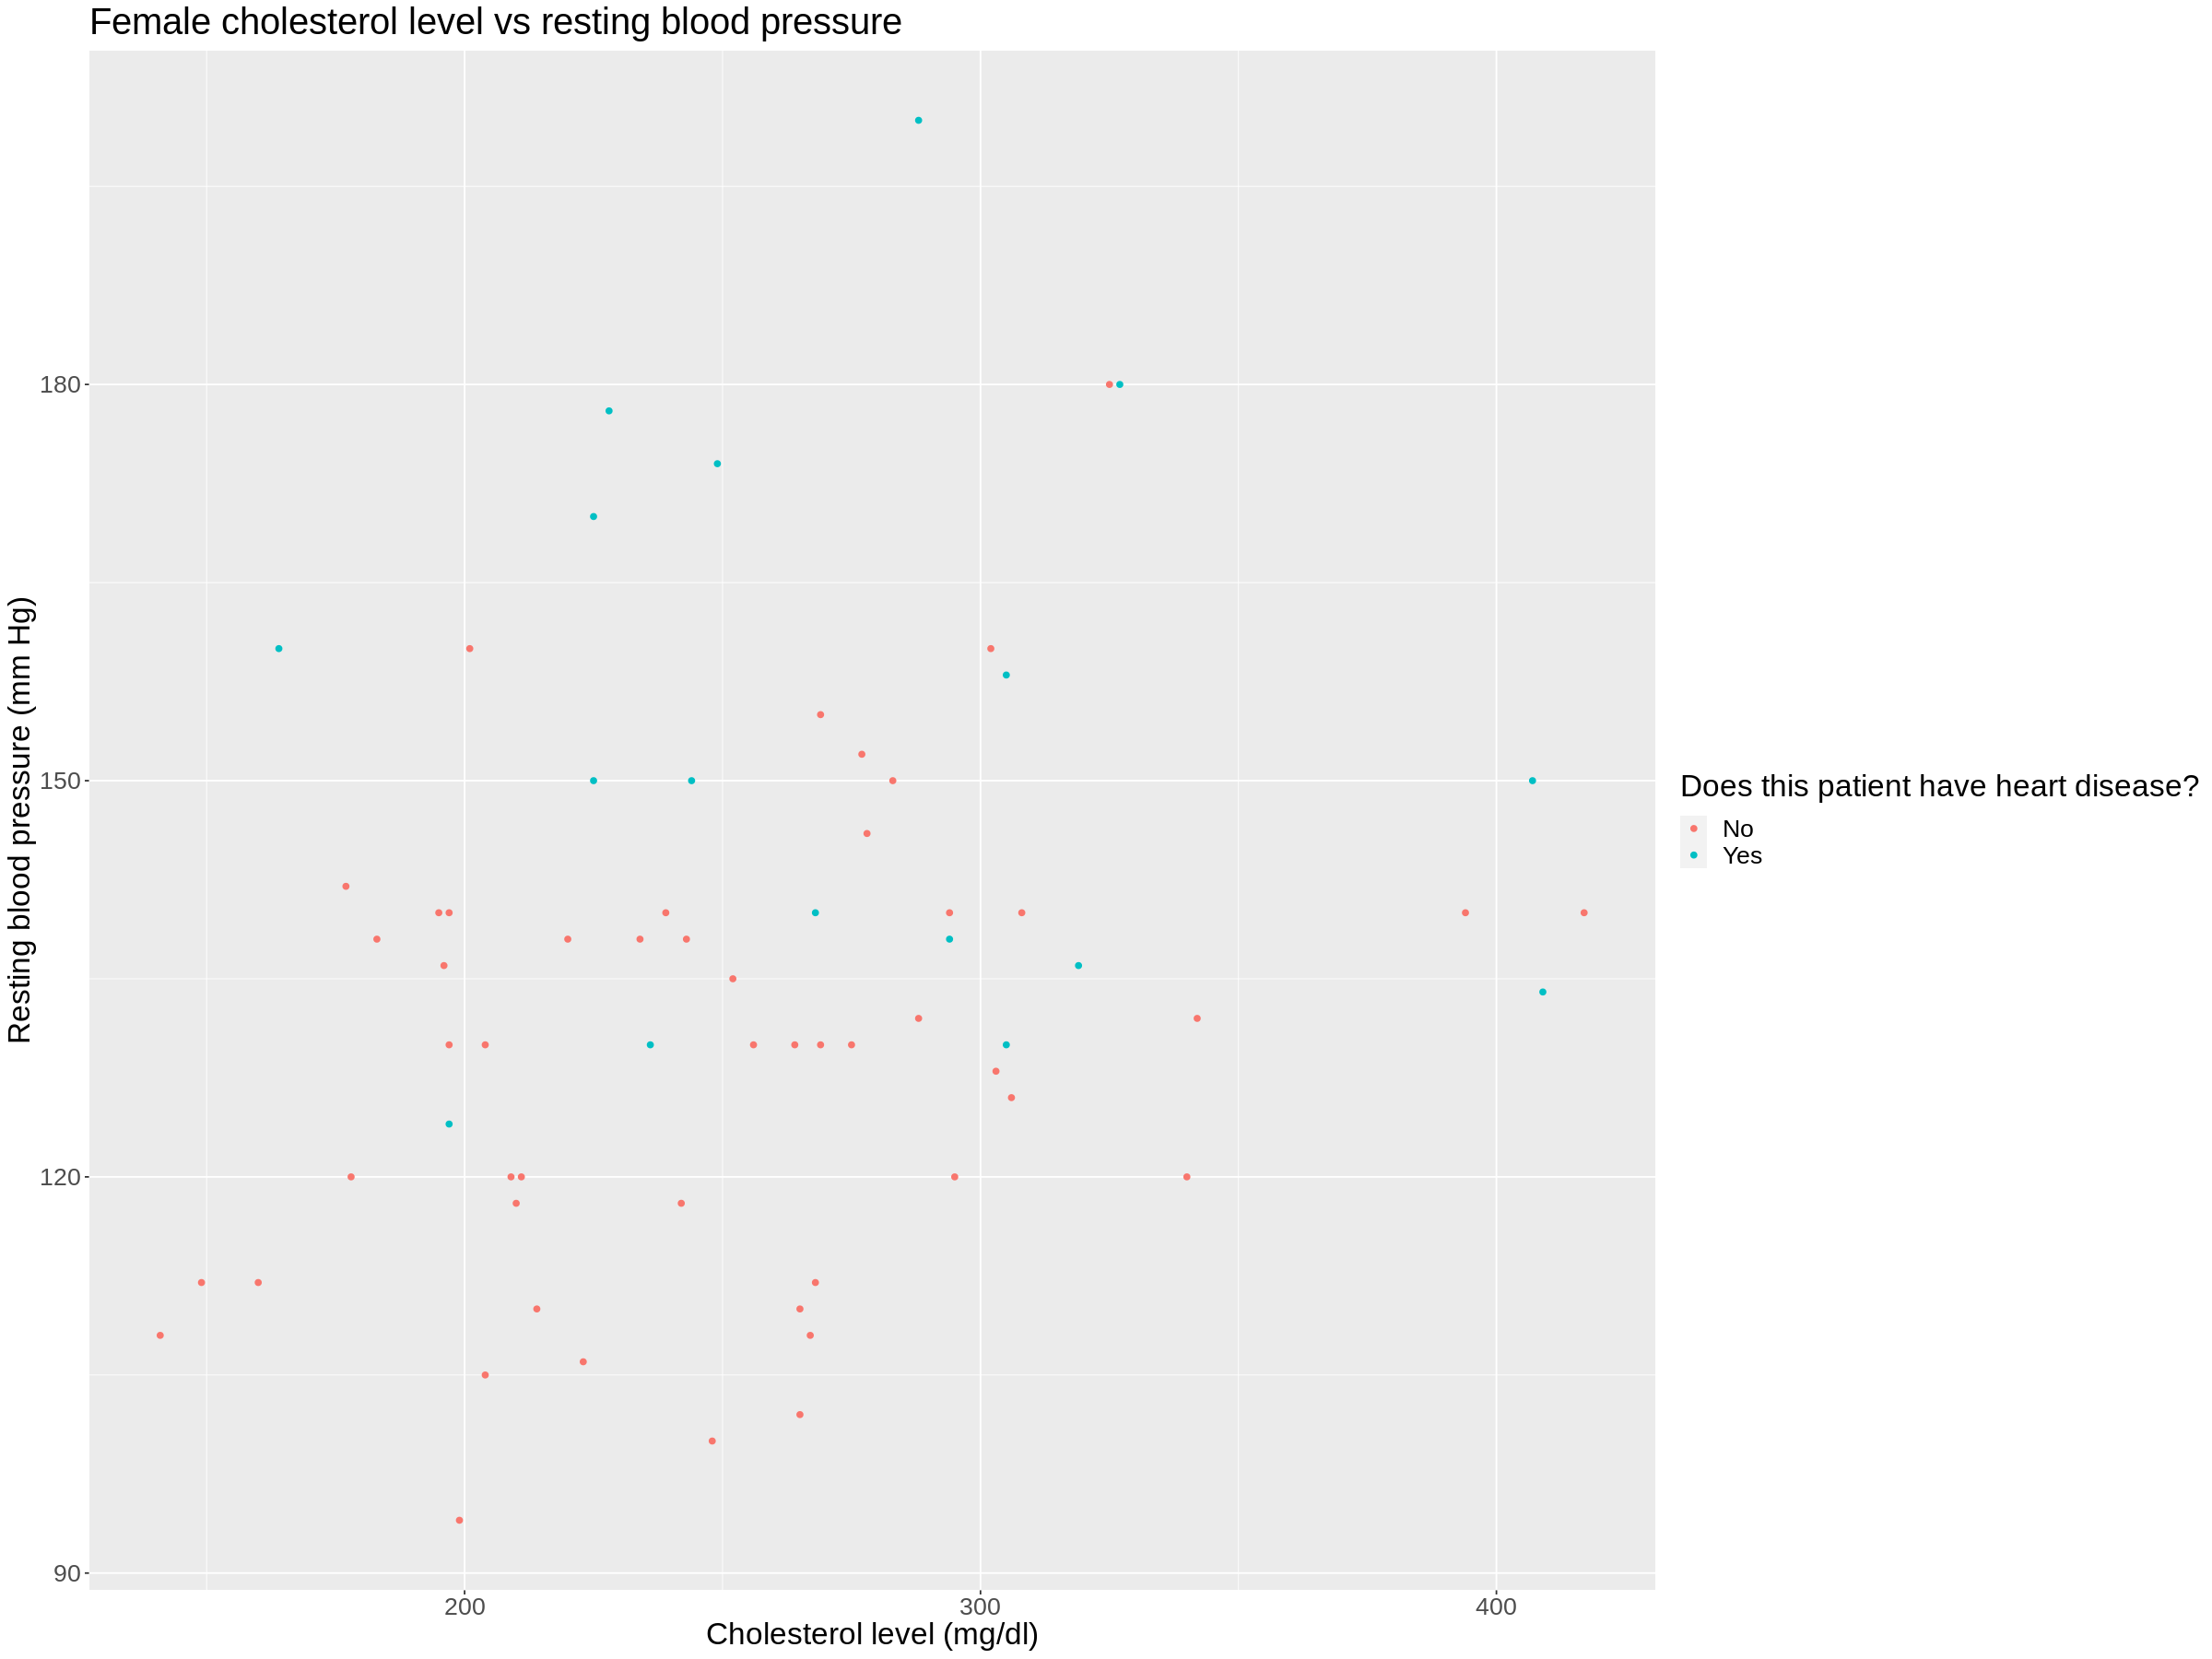

In [4]:
#Visualizing data in graphs

options(repr.plot.width = 20, repr.plot.height = 15)

male_train_plot <- ggplot(data = male_train, aes(x = cholesterol, y = resting_blood_pressure)) +
    geom_point(aes(colour = diagnosis_of_heart_disease)) +
    labs(colour = "Does this patient have heart disease?") +
    ggtitle("Male cholesterol level vs resting blood pressure") +
    xlab("Cholesterol level (mg/dl)") + 
    ylab("Resting blood pressure (mm Hg)") +
    theme(text = element_text(size = 20))

female_train_plot <- ggplot(data = female_train, aes(x = cholesterol, y = resting_blood_pressure)) +
    geom_point(aes(colour = diagnosis_of_heart_disease)) +
    labs(colour = "Does this patient have heart disease?") +
    ggtitle("Female cholesterol level vs resting blood pressure") +
    xlab("Cholesterol level (mg/dl)") + 
    ylab("Resting blood pressure (mm Hg)") +
    theme(text = element_text(size = 20))

male_train_plot
female_train_plot 

## Methods:
*Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?*

We will be using resting blood pressure(bp) and serum cholesterol(sc) as predictors, and diagnosis of heart disease as our target variable for classification. Our data is split into male and female because our preliminary explorations indicate heart disease symptoms are different for the genders, therefore, we will make 2 K-nearest classification algorithms–one for each sex. We will first set a seed, create a recipe for scaling our bp and sc, and set values for predictors (bp and sc) and a value to predict (diagnosis of heart disease). We will create model specifications, with neighbours set to tune(), and use cross-validation to split our training data into v groups to assess what the optimal K-neighbours is by comparing what K value has the best accuracy. After creating a model with the optimal K and, using another workflow, we can combine the new model with our recipe and fit it to our training datasets. This newest workflow can be used to predict on our testing data, and we will find the accuracy of our algorithm to tell us if our goal of exceeding 84% accuracy was met through a metrics and confusion matrix. We will do this twice-once for a model fit to the male training data and tested on the male testing data, and once for the female training and testing data. Afterwards, we would test our created models to predict whether one of us or an individual whose data we find online is predicted to have heart disease or not.


*Describe at least one way that you will visualize the results*

We can visualize our results with a scatter plot of bp vs. sc and colour the point based on its predicted value and shape the points by the actual value to visualize the accuracy or non-accuracy of our classification algorithm. Another way to visualize our results is through histograms, comparing the predicted and actual distribution of heart disease patients for different values of bp and sc.

## Expected outcomes and significance:

*What do you expect to find?*
We expect to uncover whether patients with heart disease tend to possess certain characteristics (ie. high blood pressure and high cholesterol), and whether we can use trends to reliably determine whether a new undiagnosed patient has heart disease.

*What impact could such findings have?*
Our findings can be used to diagnose those suspected of heart disease in a more trustworthy and easy way. As well, we can determine “safe zones” for blood pressure and cholesterol levels to gauge if a patient is susceptible to heart disease or not.

*What future questions could this lead to?*
Future questions may include how and to what extent do other variables affect the prediction of having heart disease? What other illnesses can we predict with statistics? Could the need for diagnosis by a doctor eventually become redundant if computers and statistics can do a better and more accurate job?

## Rerences:

Centers for Disease Control and Prevention. (2022, September 8). Heart disease and stroke. Centers for Disease Control and Prevention. Retrieved October 28, 2022, from https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm 

Detrano, R. Heart Disease Data Set. UCI Machine Learning Repository: Heart disease data set. Retrieved October 19, 2022, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Wong, C. W., Tafuro, J., Azam, Z., Satchithananda, D., Duckett, S., Barker, D., Patwala, A., Ahmed, F. Z., Mallen, C., &amp; Kwok, C. S. (2021, May 25). Misdiagnosis of heart failure: A systematic review of the literature. Journal of Cardiac Failure. Retrieved October 19, 2022, from https://www.sciencedirect.com/science/article/pii/S1071916421002049#:~:text=Misdiagnosis%20of%20heart%20failure%20ranges,68%25%20depending%20on%20the%20setting.&amp;text=Patients%20with%20ischemic%20heart%20disease,at%20risk%20of%20HF%20misdiagnosis.&amp;text=Patients%20with%20lung%20disease%2C%20stroke,from%20screening%20for%20heart%20failure. 